<a href="https://colab.research.google.com/github/AhohPerisic/kmg/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EB%B3%B5%EC%8A%B51.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 라이브러리 삽임
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 데이터 불러오기
df_train = pd.read_csv('/content/Training.csv') # train 데이터
df_test = pd.read_csv('/content/TEST.csv') # test 데이터
df_val = pd.read_csv('/content/Validation.csv') # val 데이터



In [5]:
# 결측값 제거하기
df_train.dropna(axis=0, inplace=True) # 아마 다 0으로 제거해서 하는듯?

In [32]:
# feature 선택 및 데이터 분류하기
selected_features =  ['Alcohol', 'Malic acid', 'Ash', 'Magnesium', 'Total phenols',
                     'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity',
                     'OD280/OD315 of diluted wines']

X_train = df_train[selected_features]
y_train = df_train['TARGET WINE CLASS']
X_test = df_test[selected_features]
y_test = df_test['TARGET WINE CLASS']


In [11]:
df_train.head()

,TARGET WINE CLASS,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40
2,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58
3,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55
4,1,14.38,1.87,2.38,12.0,102,3.30,3.64,0.29,2.96,7.50,1.20,3.00
5,1,13.63,1.81,2.70,17.2,112,2.85,2.91,0.30,1.46,7.30,1.28,2.88


In [38]:
df_train.iloc[:,2]
# 삭제할 요소 column_index or
# df_train.drop(df_train.index[column_index], axis=1, inplace=True) data delete
# row를 삭제하고자 한다면 df_train.drop(df_train.index[row_index], axis=0, inplace=True)

1     1.78
2     2.15
3     1.35
4     1.87
5     1.81
      ... 
88    1.70
89    1.61
90    1.66
91    2.89
92    3.87
Name: Malic acid, Length: 92, dtype: float64

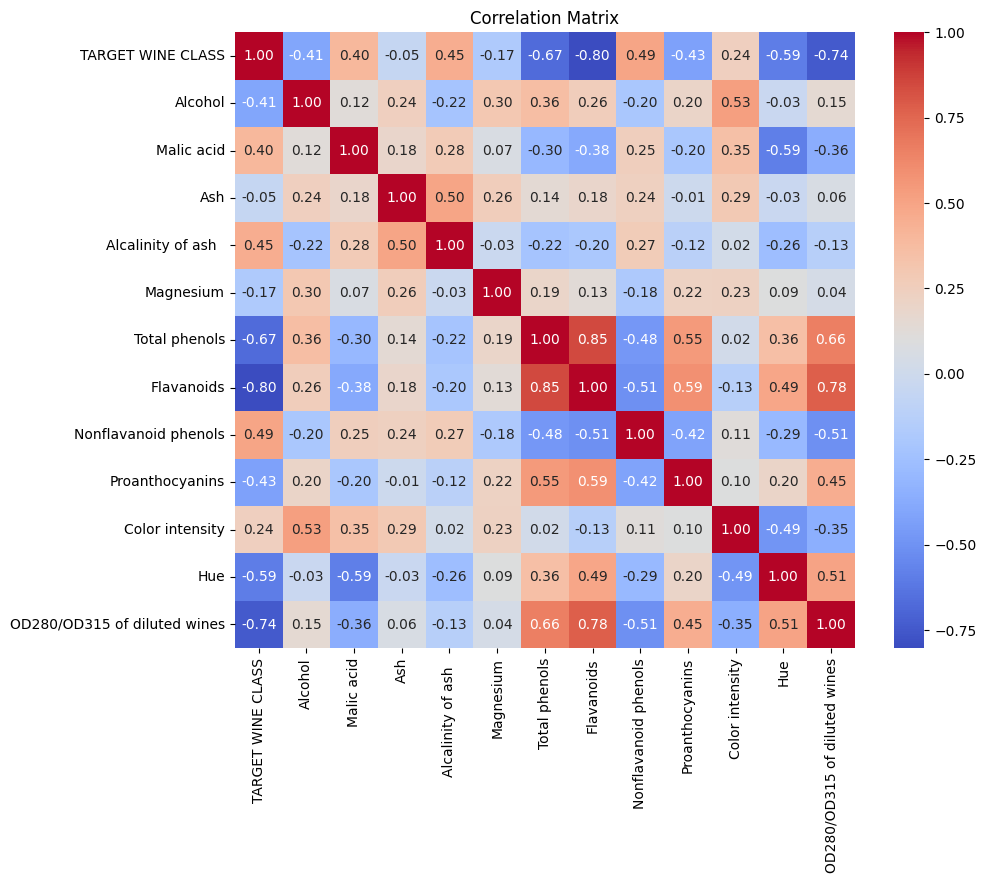

In [23]:
# correlation matrix 만들기
import seaborn as sns
correlation_matrix = df_train.corr()

plt.figure(figsize=(10,8)) # 사이즈 작성
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt = ".2f") # 그릴 그림: 히트맵
plt.title('Correlation Matrix') # 제목 짓기
plt.show()




In [31]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Preport:\n", classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9361702127659575
Classification Preport:
               precision    recall  f1-score   support

           1       1.00      0.86      0.92        14
           2       0.86      1.00      0.92        18
           3       1.00      0.93      0.97        15

    accuracy                           0.94        47
   macro avg       0.95      0.93      0.94        47
weighted avg       0.95      0.94      0.94        47

Confusion matrix:
 [[12  2  0]
 [ 0 18  0]
 [ 0  1 14]]


In [34]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

# 가우시안 나이브 베이즈 모델
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

# 베르누이 나이브 베이즈 모델
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)

# 다항 분포 나이브 베이즈 모델
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)


In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 각 모델의 성능 평가
print("Gaussian Naive Bayes:")
print("Accuracy:", accuracy_score(y_test, y_pred_gnb))
print("Classification Report:")
print(classification_report(y_test, y_pred_gnb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gnb))

print("\nBernoulli Naive Bayes:")
print("Accuracy:", accuracy_score(y_test, y_pred_bnb))
print("Classification Report:")
print(classification_report(y_test, y_pred_bnb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_bnb))

print("\nMultinomial Naive Bayes:")
print("Accuracy:", accuracy_score(y_test, y_pred_mnb))
print("Classification Report:")
print(classification_report(y_test, y_pred_mnb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_mnb))


Gaussian Naive Bayes:
Accuracy: 0.9361702127659575
Classification Report:
              precision    recall  f1-score   support

           1       0.93      0.93      0.93        14
           2       0.89      0.94      0.92        18
           3       1.00      0.93      0.97        15

    accuracy                           0.94        47
   macro avg       0.94      0.94      0.94        47
weighted avg       0.94      0.94      0.94        47

Confusion Matrix:
[[13  1  0]
 [ 1 17  0]
 [ 0  1 14]]

Bernoulli Naive Bayes:
Accuracy: 0.3829787234042553
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        14
           2       0.38      1.00      0.55        18
           3       0.00      0.00      0.00        15

    accuracy                           0.38        47
   macro avg       0.13      0.33      0.18        47
weighted avg       0.15      0.38      0.21        47

Confusion Matrix:
[[ 0 14  0]
 [ 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# 가우시안 나이브 베이즈 모델 생성
naive_bayes_model = GaussianNB()

# k-fold 교차 검증을 통한 모델 성능 평가
scores = cross_val_score(naive_bayes_model, X_train, y_train, cv=5)  # cv는 fold의 개수를 지정합니다.

# 교차 검증 결과 출력
print("Cross-Validation Scores:", scores)
print("Average Accuracy:", scores.mean())


Cross-Validation Scores: [0.94736842 0.94736842 0.72222222 1.         0.88888889]
Average Accuracy: 0.9011695906432748


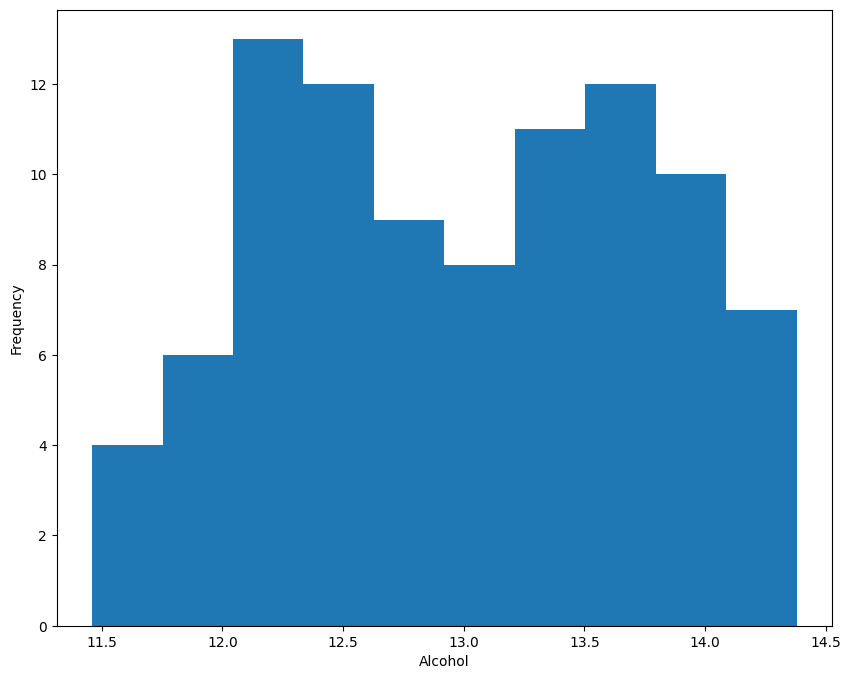

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.hist(df_train['Alcohol'], bins=10)  # 히스토그램을 그릴 때는 bins 매개변수를 사용하여 막대의 개수를 지정할 수 있습니다.
plt.xlabel('Alcohol')
plt.ylabel('Frequency')
plt.show()


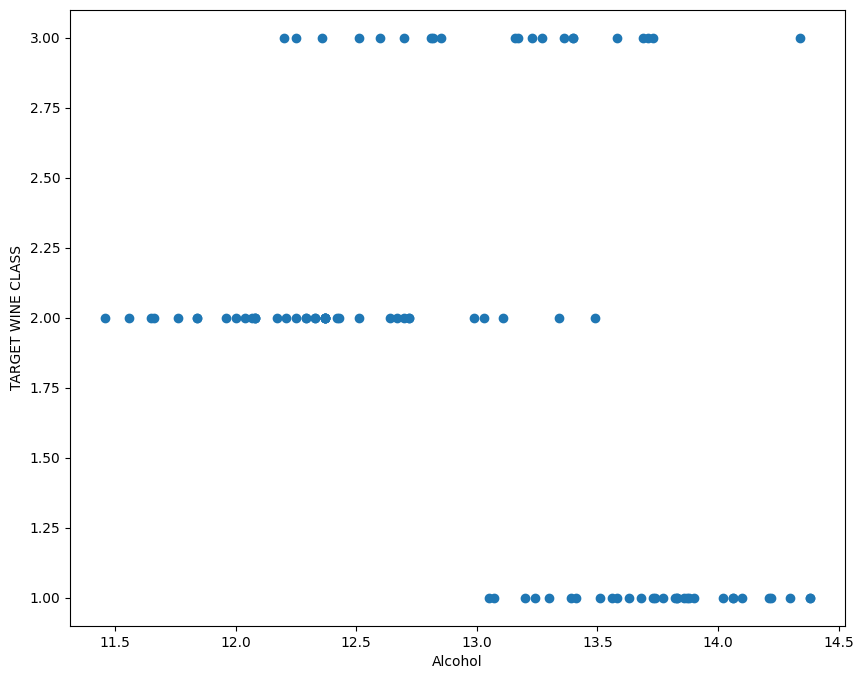

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.scatter(df_train['Alcohol'], df_train['TARGET WINE CLASS'])
plt.xlabel('Alcohol')
plt.ylabel('TARGET WINE CLASS')
plt.show()